In [316]:
base_url = "..//dataset//"

# Loading Libraries

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns
import scipy.stats as stat
import pylab 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

# Agenda

1. Use Variance Threshold to see which features have minimal variance 

2. Corelation Analysis

3. Mutual Information Analysis

4. Chi Square Analysis

5. Model Based Methods (Random Forests, Lasso)

6. Transformations(Log, Reciprocal, Box Cox etc) on selected features

7. Final Pipeline

# Loading the data

In [318]:
df = pd.read_csv(base_url+'phishing_full.csv')

In [319]:
features_to_skip = ['time_response','domain_spf','asn_ip','time_domain_expiration','qty_ip_resolved','qty_nameservers',
                   'qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_google_index','domain_google_index','url_shortened']

In [320]:
list(df.columns).index('time_response')

97

In [321]:
df.drop(features_to_skip,axis=1, inplace=True)

In [322]:
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_domain_activation,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,579,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,6998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,5509,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,34,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,5046,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

# Create Train and Test Data (Using stratified Shuffle Split)

In [323]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [324]:
for train_index,test_index in split.split(df, df['phishing']):
    print(train_index,test_index)

[81747 18230  9266 ... 52746 80226 27947] [18921 74673 19334 ... 68007 58349 38230]


In [325]:
for train_index,test_index in split.split(df, df['phishing']):
    X_train = df.loc[train_index]
    X_test = df.loc[test_index]

In [326]:
X_train, y_train = X_train.drop(['phishing'],axis = 1),X_train['phishing']

In [327]:
X_test, y_test = X_test.drop(['phishing'],axis = 1),X_test['phishing']

# Standardization

In [328]:
sc = StandardScaler()

In [329]:
X_train = sc.fit_transform(X_train)

In [330]:
X_test = sc.transform(X_test)

In [331]:
cols = df.drop(['phishing'],axis=1).columns

In [332]:
X_train = pd.DataFrame(X_train, columns=cols)

In [333]:
X_test = pd.DataFrame(X_test, columns=cols)

# 1. Dropping Constant features - Variance Threshold

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement.

We remove those features, which have very minimal variance. That simply means that these features are constant

In [334]:
from sklearn.feature_selection import VarianceThreshold

In [335]:
var_thresh_obj = VarianceThreshold(threshold=0)

In [336]:
var_thresh_obj.fit(X_train)

VarianceThreshold(threshold=0)

In [337]:
var_thresh_obj.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [338]:
constant_columns = [column for column in X_train.columns if column not in set(X_train.columns[var_thresh_obj.get_support()])]

In [339]:
constant_columns

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

#### We are not going to use these features and we will drop these

# 2. Corelation Analysis

******
If an Independant feature and dependant feature are corelated, that is desireable

If 2 independant features are corelated, we can easily drop one as it reduces Curse of Dimesnionality, also reduces Multi Colinearity

******

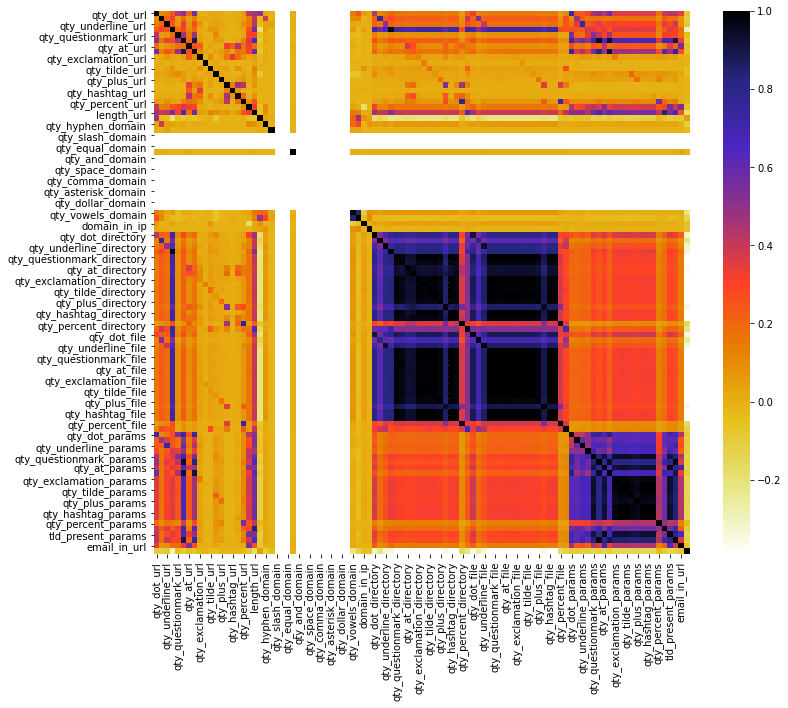

In [340]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

I will give more emphasis on removing last 18 features, they are coming from external sites and might be hard for us to build the features from raw domains

In [341]:
## We set a corelation threshold (probably 0.85)
## We iterate on corelation matrix and see if 2 features have this much or greater corelation.
## If they have, we will remove one of the features.

def get_high_correlation_feature(dataset, threshold):
    col_corr = set() ## set of column names to be dropped
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)-1,-1,-1):
        for j in range(i-1,-1,-1):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] ## getting the column name
                #print(corr_matrix.columns[i],"-----" ,corr_matrix.columns[j], "====", corr_matrix.iloc[i,j])
                col_corr.add(colname)
    return(col_corr)
            

In [342]:
corelated_features = get_high_correlation_feature(X_train,0.85)

In [343]:
corelated_features

{'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_params',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_space_params',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_tilde_params',
 'qty_underline_file',
 'tld_present_params'}

# Information Gain (Mutual Information)

#### Mutual Information: A non negative value, that measures the dependancy b/w the variables. It quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable by observing the other random variable..


Higher the value, more important the feature is

In [344]:
from sklearn.feature_selection import mutual_info_classif

In [345]:
mutual_info = mutual_info_classif(X_train,y_train)

In [346]:
mutual_info = pd.Series(mutual_info)

In [347]:
mutual_info.index = X_train.columns

In [348]:
mutual_info.sort_values(ascending=False)

directory_length        0.381784
qty_slash_url           0.378802
qty_slash_directory     0.375063
qty_dot_directory       0.352343
file_length             0.352039
                          ...   
qty_asterisk_domain     0.000000
qty_comma_url           0.000000
qty_asterisk_url        0.000000
qty_underline_domain    0.000000
qty_hashtag_url         0.000000
Length: 98, dtype: float64

#### Selecting the K best from MI

In [350]:
from sklearn.feature_selection import SelectKBest

In [351]:
sel_cols = SelectKBest(mutual_info_classif, k = 50)
sel_cols.fit(X_train,y_train)

SelectKBest(k=50,
            score_func=<function mutual_info_classif at 0x00000225E9C34C10>)

In [352]:
X_train.columns[sel_cols.get_support()]

Index(['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_underline_params',
       'qty_slash_params', 'qty_at_params', 'qty_tilde_params

# Top k will be a hyperparamter, fiddle with it in model selection

# Model Based methods

In [354]:
from sklearn.ensemble import RandomForestClassifier

In [355]:
rf = RandomForestClassifier()

In [356]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [357]:
imp = rf.feature_importances_

In [358]:
imp = pd.Series(imp)
imp.index = X_train.columns


In [359]:
imp.sort_values(ascending=False)

directory_length          0.161190
time_domain_activation    0.113218
length_url                0.040123
file_length               0.036635
qty_slash_url             0.035162
                            ...   
qty_plus_domain           0.000000
qty_comma_domain          0.000000
qty_tilde_domain          0.000000
qty_space_domain          0.000000
qty_and_domain            0.000000
Length: 98, dtype: float64

In [360]:
cum_sum = np.cumsum(imp.sort_values(ascending=False))

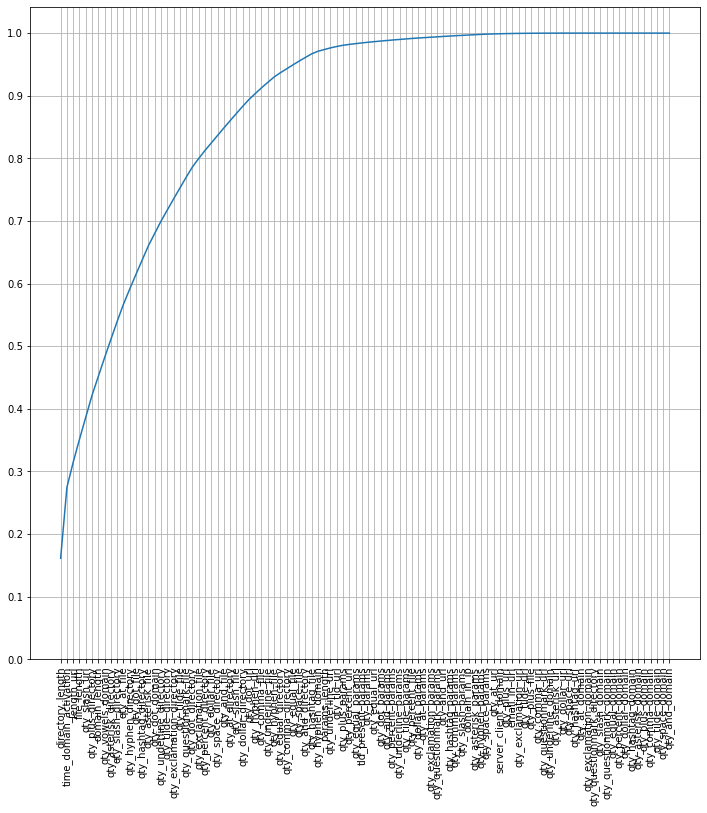

In [361]:
plt.figure(figsize=(12,12))
plt.plot(np.cumsum(imp.sort_values(ascending=False)))
plt.xticks(rotation = '90')
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.show()

In [362]:
cum_sum['qty_comma_params']

0.9959015844508111

In [363]:
list(cum_sum.index).index('qty_comma_params')

63

In [364]:
cum_sum[:40]

directory_length             0.161190
time_domain_activation       0.274408
length_url                   0.314531
file_length                  0.351166
qty_slash_url                0.386328
qty_plus_directory           0.421407
domain_length                0.451500
qty_vowels_domain            0.481464
qty_asterisk_directory       0.510624
qty_slash_directory          0.539215
qty_at_file                  0.566640
qty_hyphen_directory         0.590975
qty_dot_file                 0.614553
qty_hashtag_directory        0.637694
qty_asterisk_file            0.660704
qty_dot_domain               0.680247
qty_underline_directory      0.699754
qty_tilde_directory          0.717485
qty_exclamation_directory    0.735159
qty_tilde_file               0.752429
qty_questionmark_file        0.769698
qty_dot_directory            0.786159
qty_exclamation_file         0.799716
qty_percent_directory        0.812506
qty_dollar_file              0.824462
qty_space_directory          0.836416
qty_and_file

In [365]:
from sklearn.metrics import classification_report

In [366]:
predictions = rf.predict(X_test)

In [367]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.93      0.93      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



### Let's see how many features to keep

In [368]:
features_to_keep = [40,50,60,70]

In [379]:
temp = X_train[cum_sum.index[0:features_to_keep[2]]]

In [380]:
rf = RandomForestClassifier()
rf.fit(temp,y_train)

RandomForestClassifier()

In [381]:
predictions = rf.predict(X_test[cum_sum.index[0:features_to_keep[2]]])
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.93      0.94      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



In [386]:
cum_sum[0:60]

directory_length             0.161190
time_domain_activation       0.274408
length_url                   0.314531
file_length                  0.351166
qty_slash_url                0.386328
qty_plus_directory           0.421407
domain_length                0.451500
qty_vowels_domain            0.481464
qty_asterisk_directory       0.510624
qty_slash_directory          0.539215
qty_at_file                  0.566640
qty_hyphen_directory         0.590975
qty_dot_file                 0.614553
qty_hashtag_directory        0.637694
qty_asterisk_file            0.660704
qty_dot_domain               0.680247
qty_underline_directory      0.699754
qty_tilde_directory          0.717485
qty_exclamation_directory    0.735159
qty_tilde_file               0.752429
qty_questionmark_file        0.769698
qty_dot_directory            0.786159
qty_exclamation_file         0.799716
qty_percent_directory        0.812506
qty_dollar_file              0.824462
qty_space_directory          0.836416
qty_and_file

# We will keep top 60 features as they seem to be enough to get us good precision and recall

### Among the last 18 features for which we need to rely on external sites, I have decided to keep only time_domain_activation as it is one of the most important features

# Extracting important features 

In [149]:
example_domain = "https://zvento.com/secure/vpass/id/"

#### Domain Activation Time

In [387]:
import whois
def get_time_domain_activation(domain):
    try:
        res = whois.whois(example_domain)
        days= (datetime.datetime.now()-d).days
        return days
    except:
        return -1

In [388]:
get_time_domain_activation(example_domain)

1307

# TTl hostname

In [257]:
import subprocess
import re
def get_ttl(domain):
    try:
        p = subprocess.Popen(["ping",domain], stdout=subprocess.PIPE)
        res=p.communicate()[0]
        pattern = re.compile('TTL=\d*')
        ttl =  pattern.search(str(res)).group()
        return float(ttl.split("=")[1])
    except:
        return -1

In [259]:
get_ttl(example_domain)

-1

### Final Feature Selection

In [389]:
cum_sum[0:60]

directory_length             0.161190
time_domain_activation       0.274408
length_url                   0.314531
file_length                  0.351166
qty_slash_url                0.386328
qty_plus_directory           0.421407
domain_length                0.451500
qty_vowels_domain            0.481464
qty_asterisk_directory       0.510624
qty_slash_directory          0.539215
qty_at_file                  0.566640
qty_hyphen_directory         0.590975
qty_dot_file                 0.614553
qty_hashtag_directory        0.637694
qty_asterisk_file            0.660704
qty_dot_domain               0.680247
qty_underline_directory      0.699754
qty_tilde_directory          0.717485
qty_exclamation_directory    0.735159
qty_tilde_file               0.752429
qty_questionmark_file        0.769698
qty_dot_directory            0.786159
qty_exclamation_file         0.799716
qty_percent_directory        0.812506
qty_dollar_file              0.824462
qty_space_directory          0.836416
qty_and_file

In [390]:
top_60_features = cum_sum.index[0:60]

In [391]:
top_60_features

Index(['directory_length', 'time_domain_activation', 'length_url',
       'file_length', 'qty_slash_url', 'qty_plus_directory', 'domain_length',
       'qty_vowels_domain', 'qty_asterisk_directory', 'qty_slash_directory',
       'qty_at_file', 'qty_hyphen_directory', 'qty_dot_file',
       'qty_hashtag_directory', 'qty_asterisk_file', 'qty_dot_domain',
       'qty_underline_directory', 'qty_tilde_directory',
       'qty_exclamation_directory', 'qty_tilde_file', 'qty_questionmark_file',
       'qty_dot_directory', 'qty_exclamation_file', 'qty_percent_directory',
       'qty_dollar_file', 'qty_space_directory', 'qty_and_file',
       'qty_at_directory', 'qty_slash_file', 'qty_dollar_directory',
       'qty_dot_url', 'qty_hyphen_url', 'qty_comma_file', 'qty_underline_file',
       'qty_hyphen_file', 'qty_equal_directory', 'qty_comma_directory',
       'qty_equal_file', 'qty_space_file', 'qty_and_directory',
       'qty_hashtag_file', 'qty_hyphen_domain', 'params_length',
       'qty_under

In [392]:
corelated_features

{'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_params',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_space_params',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_tilde_params',
 'qty_underline_file',
 'tld_present_params'}

In [393]:
constant_columns

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

## Constant Columns that are part of top 60 features

In [398]:
set(constant_columns).intersection(set(top_60_features))

set()

There is no constant feature in top 60 features

## Corelation analysis on top 60 features

In [402]:
X_train_top_60 = X_train[top_60_features]

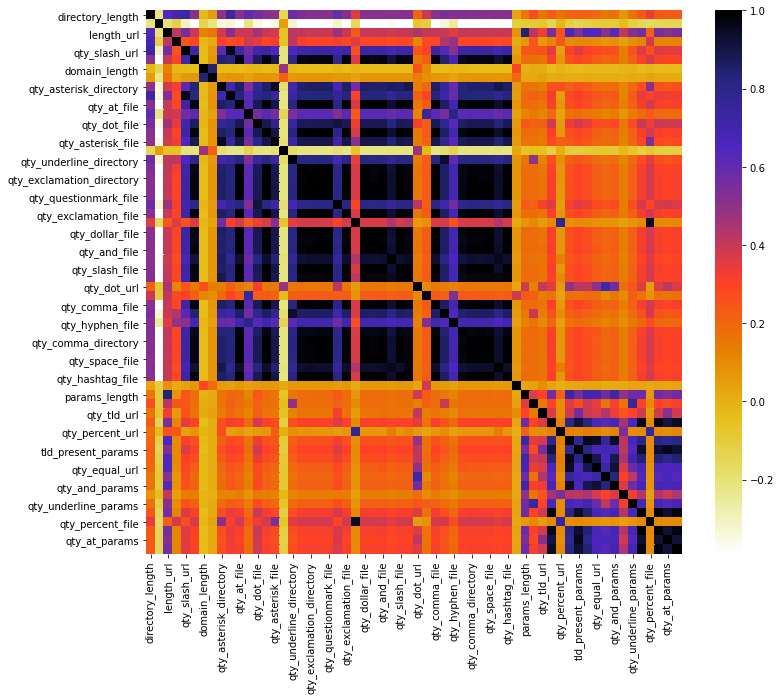

In [403]:
plt.figure(figsize=(12,10))
cor = X_train_top_60.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

In [405]:
top_60_corelated_features = get_high_correlation_feature(X_train_top_60,0.85)

In [407]:
len(top_60_corelated_features)

34

In [408]:
X_train_top_60.drop(top_60_corelated_features,axis=1,inplace=True)

C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [411]:
X_test_top_60 = X_test[X_train_top_60.columns]

In [414]:
rf = RandomForestClassifier()
rf.fit(X_train_top_60,y_train)


RandomForestClassifier()

In [415]:
predictions = rf.predict(X_test_top_60)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.93      0.93      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



# We are getting good results even after dropping highly corelated features. So we can go ahead with the top 26 features itself

In [416]:
top_features = X_train_top_60.columns

In [417]:
top_features

Index(['directory_length', 'time_domain_activation', 'length_url',
       'file_length', 'qty_slash_url', 'qty_plus_directory', 'domain_length',
       'qty_vowels_domain', 'qty_asterisk_directory', 'qty_hyphen_directory',
       'qty_dot_domain', 'qty_underline_directory', 'qty_percent_directory',
       'qty_dot_url', 'qty_hyphen_url', 'qty_hyphen_file', 'qty_hyphen_domain',
       'params_length', 'qty_underline_url', 'qty_tld_url', 'qty_plus_params',
       'qty_percent_url', 'qty_equal_params', 'qty_dot_params',
       'qty_percent_params', 'qty_underline_params'],
      dtype='object')